# DS 542 - 2025 Fall - Homework 3

Solve the following problems using PyTorch and then submit in [Gradescope](https://www.gradescope.com/courses/1071076).


Do not use any PyTorch module classes for any of the problems.



Tensors and functions such as `tensor.log` and automatic gradient tracking are allowed.

## Problem 1 - Compute Roots of a Function

The roots of a function are inputs that make that function zero.
Use gradient descent to solve for both roots of $f(x) = x^2 - 4x + 1$.

Save the two roots in a variable `roots` and print it.

Hint: The discussion on 9/17 will focus on similar problems.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import math

In [2]:
def f(x):
  return x**2 - 4*x + 1

In [3]:
a = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
lr = 0.05
steps = 2000
loss_hist, a_hist, b_hist = [], [], []

for t in range(steps):
    loss = f(a)**2 + f(b)**2
    loss_hist.append(loss.item())
    a_hist.append(a.item())
    b_hist.append(b.item())

    loss.backward()

    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad

        a.grad.zero_()
        b.grad.zero_()

roots = [a.item(), b.item()]

In [4]:
# YOUR CHANGES HERE
roots

[0.2679491937160492, 3.732050895690918]

## Problem 2 - Implement Logistic Regression

Implement logistic regression in PyTorch to predict the outcome column of the Pima Indians Diabetes data set.

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/raw/refs/heads/master/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
input_df = df.drop(columns=["Outcome"])
target = df["Outcome"]

### Part A - Setup the Logistic Regression and Prediction Function

In [14]:
# YOUR CHANGES HERE
n_features = 8
weights = torch.randn(n_features, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)

def predict(X, weights, bias):

    z = torch.matmul(X, weights) + bias

    # Apply sigmoid
    predictions = torch.sigmoid(z)

    return predictions

### Part B - Write a Function Calculating the Loss for this Logistic Regression

In [15]:
# Loss function
def compute_loss(y_true, y_pred):
    eps = 1e-15  # Small value to prevent log(0)
    m = y_true.shape[0]
    loss = -(1/m) * torch.sum(
        y_true * torch.log(y_pred + eps) +
        (1 - y_true) * torch.log(1 - y_pred + eps)
    )
    return loss

### Part C - Optimize the Logistic Regression Parameters using Gradient Descent

*   List item
*   List item



In [18]:
lr = 0.01
steps = 3000
loss_hist = []
input_df_tensor = torch.tensor(input_df.values, dtype=torch.float32)
target_tensor = torch.tensor(target.values, dtype=torch.float32)

for t in range(steps):
    predictions = predict(input_df_tensor, weights, bias)  # predict function
    loss = compute_loss(target_tensor, predictions)        # loss function

    loss.backward()

    with torch.no_grad():
        weights -= lr * weights.grad
        bias -= lr * bias.grad

    weights.grad.zero_()
    bias.grad.zero_()

    if t % 10 == 0:
        loss_hist.append(loss.item())
        print(f"Step {t}, Loss: {loss.item():.4f}")

Step 0, Loss: 8.8398
Step 10, Loss: 9.8129
Step 20, Loss: 8.9626
Step 30, Loss: 8.6972
Step 40, Loss: 9.4425
Step 50, Loss: 9.4460
Step 60, Loss: 9.4420
Step 70, Loss: 9.1806
Step 80, Loss: 9.7823
Step 90, Loss: 9.1883
Step 100, Loss: 7.1610
Step 110, Loss: 5.6082
Step 120, Loss: 15.6369
Step 130, Loss: 9.1407
Step 140, Loss: 9.5478
Step 150, Loss: 9.1187
Step 160, Loss: 9.4755
Step 170, Loss: 10.3172
Step 180, Loss: 10.7017
Step 190, Loss: 15.2408
Step 200, Loss: 15.9872
Step 210, Loss: 15.9782
Step 220, Loss: 10.7913
Step 230, Loss: 8.7504
Step 240, Loss: 8.9060
Step 250, Loss: 10.2949
Step 260, Loss: 12.0962
Step 270, Loss: 6.5287
Step 280, Loss: 5.6941
Step 290, Loss: 14.3367
Step 300, Loss: 8.7524
Step 310, Loss: 8.2178
Step 320, Loss: 5.6370
Step 330, Loss: 15.3087
Step 340, Loss: 16.0872
Step 350, Loss: 15.9033
Step 360, Loss: 15.7443
Step 370, Loss: 16.0086
Step 380, Loss: 14.3530
Step 390, Loss: 16.2742
Step 400, Loss: 16.0516
Step 410, Loss: 15.7942
Step 420, Loss: 15.7219
St

### Part D - Plot Ground Truth vs Predicted Probabilities

Make a scatter plot where your logistic regression's predictions for each row of the data set are the x-axis, and the actual outcome is the y axis.

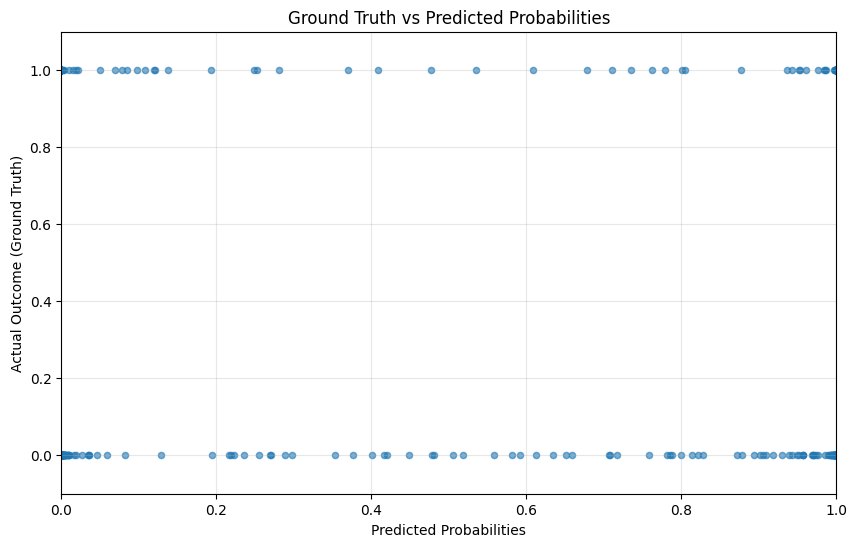

In [21]:
# Get final predictions after training
with torch.no_grad():  # Don't need gradients for evaluation
    final_predictions = predict(input_df_tensor, weights, bias)

# Convert to numpy for plotting
pred_probs = final_predictions.numpy()
actual_outcomes = target_tensor.numpy()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pred_probs, actual_outcomes, alpha=0.6, s=20)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Actual Outcome (Ground Truth)')
plt.title('Ground Truth vs Predicted Probabilities')
plt.grid(True, alpha=0.3)

# Set axis limits
plt.xlim(0, 1)
plt.ylim(-0.1, 1.1)

plt.show()

## Problem 3 - Implement a Shallow Neural Network

Implement a neural network with one hidden layer to predict the outcome column of the Pima Indians Diabetes data set.

### Part A - Setup the Neural Network and Prediction Function





In [22]:
import torch
import torch.nn.functional as F

# Neural network parameters
input_size = 8      # 8 features
hidden_size = 10    # You can adjust this (try 5, 10, 20)
output_size = 1     # Binary classification

# Initialize weights and biases
W1 = torch.randn(input_size, hidden_size, requires_grad=True)  # Input to hidden
b1 = torch.zeros(hidden_size, requires_grad=True)              # Hidden bias
W2 = torch.randn(hidden_size, output_size, requires_grad=True) # Hidden to output
b2 = torch.zeros(output_size, requires_grad=True)              # Output bias

def predict_nn(X, W1, b1, W2, b2):
    # Forward pass
    z1 = torch.matmul(X, W1) + b1    # Linear transformation to hidden layer
    a1 = torch.relu(z1)              # ReLU activation function
    z2 = torch.matmul(a1, W2) + b2   # Linear transformation to output
    predictions = torch.sigmoid(z2)  # Sigmoid for binary classification

    return predictions

### Part B - Write a Function Calculating the Loss for the Neural Network

In [23]:
def compute_nn_loss(y_true, y_pred):
    eps = 1e-15  # Small value to prevent log(0)
    m = y_true.shape[0]

    # Reshape y_pred to match y_true if needed
    y_pred = y_pred.squeeze()  # Remove extra dimensions

    loss = -(1/m) * torch.sum(
        y_true * torch.log(y_pred + eps) +
        (1 - y_true) * torch.log(1 - y_pred + eps)
    )
    return loss

### Part C - Optimize the Neural Network with Gradient Descent

In [26]:
# Convert data to tensors (same as before)
input_df_tensor = torch.tensor(input_df.values, dtype=torch.float32)
target_tensor = torch.tensor(target.values, dtype=torch.float32)

# Training parameters
lr = 0.01
steps = 5000  # More steps for neural network
loss_hist = []

# Training loop
for t in range(steps):
    # Forward pass
    predictions = predict_nn(input_df_tensor, W1, b1, W2, b2)

    # Compute loss
    loss = compute_nn_loss(target_tensor, predictions)

    # Backward pass
    loss.backward()

    # Update parameters
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

    # Zero gradients
    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()

    # Track loss history
    if t % 100 == 0:
        loss_hist.append(loss.item())
        print(f"Step {t}, Loss: {loss.item():.4f}")

Step 0, Loss: 0.9608
Step 100, Loss: 0.9602
Step 200, Loss: 0.9591
Step 300, Loss: 0.9586
Step 400, Loss: 0.9577
Step 500, Loss: 0.9575
Step 600, Loss: 0.9564
Step 700, Loss: 0.9554
Step 800, Loss: 0.9551
Step 900, Loss: 0.9542
Step 1000, Loss: 0.9527
Step 1100, Loss: 0.9516
Step 1200, Loss: 0.9511
Step 1300, Loss: 0.9503
Step 1400, Loss: 0.9492
Step 1500, Loss: 0.9486
Step 1600, Loss: 0.9487
Step 1700, Loss: 0.9466
Step 1800, Loss: 0.9456
Step 1900, Loss: 0.9446
Step 2000, Loss: 0.9451
Step 2100, Loss: 0.9450
Step 2200, Loss: 0.9427
Step 2300, Loss: 0.9433
Step 2400, Loss: 0.9422
Step 2500, Loss: 0.9424
Step 2600, Loss: 0.9428
Step 2700, Loss: 0.9411
Step 2800, Loss: 0.9405
Step 2900, Loss: 0.9419
Step 3000, Loss: 0.9395
Step 3100, Loss: 0.9387
Step 3200, Loss: 0.9399
Step 3300, Loss: 0.9372
Step 3400, Loss: 0.9380
Step 3500, Loss: 0.9380
Step 3600, Loss: 0.9371
Step 3700, Loss: 0.9381
Step 3800, Loss: 0.9336
Step 3900, Loss: 0.9332
Step 4000, Loss: 0.9316
Step 4100, Loss: 0.9300
Step

### Part D - Plot Ground Truth vs Predicted Probabilities

Make a scatter plot where your neural network's predictions for each row of the data set are the x-axis, and the actual outcome is the y axis.

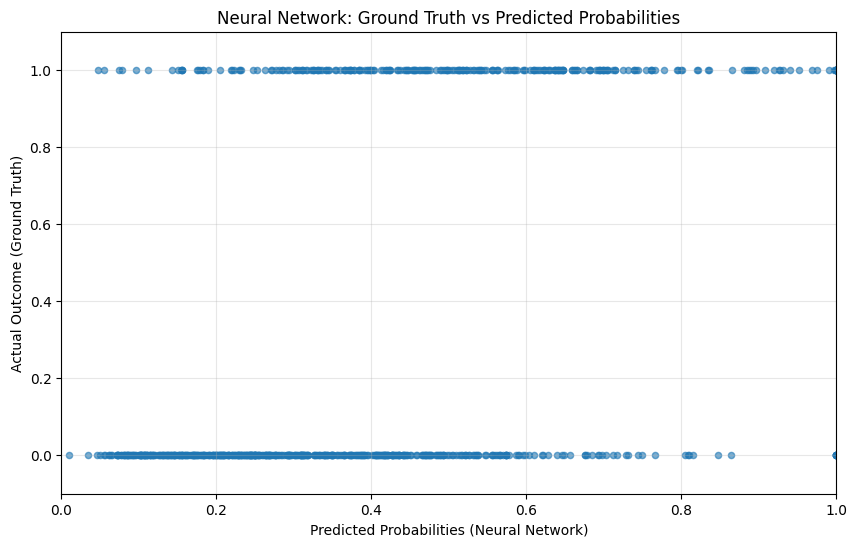

In [27]:
# Get final predictions after training
with torch.no_grad():
    final_predictions_nn = predict_nn(input_df_tensor, W1, b1, W2, b2)

# Convert to numpy for plotting
pred_probs_nn = final_predictions_nn.squeeze().numpy()
actual_outcomes = target_tensor.numpy()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pred_probs_nn, actual_outcomes, alpha=0.6, s=20)
plt.xlabel('Predicted Probabilities (Neural Network)')
plt.ylabel('Actual Outcome (Ground Truth)')
plt.title('Neural Network: Ground Truth vs Predicted Probabilities')
plt.grid(True, alpha=0.3)

# Set axis limits
plt.xlim(0, 1)
plt.ylim(-0.1, 1.1)

plt.show()